In [110]:
from keras.datasets import reuters
from keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import copy

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data), len(test_data)

(8982, 2246)

Decoding data

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Creating validation dataset

In [13]:
X_val = X_train[:1000]
partial_x_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Network constraction

In [10]:
from keras import models
from keras import layers

In [342]:
class TrainingPlot(Callback):
    
    def __init__(self, hist_old=None):
        # Initialize the lists for holding the logs, losses and accuracies
        if hist_old is None:
            self.losses = []
            self.acc = []
            self.val_losses = []
            self.val_acc = []
            self.logs = []
            self.hist_old = None
            self.history = {}
        else:
            self.hist_old = []
            self.losses = []
            self.acc = []
            self.val_losses = []
            self.val_acc = []
            self.history = {}
            # Append old and new history 
            self.hist_old.append(hist_old)
            self.losses = hist_old.losses[:]
            self.acc = hist_old.acc[:]
            self.val_losses = hist_old.val_losses[:]
            self.val_acc = hist_old.val_acc[:]
        
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses and accuracies to the lists
        #self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        self.val_acc.append(logs.get('val_acc'))
        
        # Before plotting ensure at least 2 epochs have passed
        if len(self.losses) > 1:
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            min_eph_val_loss = np.argmin(self.val_losses)
            max_eph_val_loss = np.argmax(self.val_losses)
            min_value_val_loss = min(self.val_losses)
            max_value_val_loss = max(self.val_losses)
            
            min_eph_val_acc = np.argmin(self.val_acc)
            max_eph_val_acc = np.argmax(self.val_acc)
            min_value_val_acc = min(self.val_acc)
            max_value_val_acc = max(self.val_acc)
            
            # You can chose the style of your preference
            # print(plt.style.available) to see the available options            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            
            plt.figure(figsize=(20,6))
            plt.style.use("seaborn-dark-palette")
            # Return default style
            #plt.style.use('classic') 
            plt.subplot(1, 2, 1)            
            plt.plot(N, self.losses, label = "train_loss")            
            plt.plot(N, self.val_losses, label = "val_loss")            
            plt.scatter(min_eph_val_loss, min_value_val_loss, color='red', s=40, marker='o',
                        label= 'Min at '+str(min_eph_val_loss)+' epoch')
            
            plt.title("Training Loss [Epoch {}]".format(epoch))
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.grid(linewidth=0.2)
            plt.legend(loc='best')
            
            plt.subplot(1, 2, 2)
            plt.plot(N, self.acc, label = "train_acc")
            plt.plot(N, self.val_acc, label = "val_acc")                    
            plt.scatter(max_eph_val_acc, max_value_val_acc, color='red', s=40, marker='o',
                        label= 'Max at '+str(max_eph_val_acc)+' epoch')
            
            plt.title("Training Accuracy [Epoch {}]".format(epoch))
            plt.xlabel("Epochs")
            plt.ylabel("Accuracy")
            plt.legend(loc='best')
            plt.grid(linewidth=0.2)
            plt.show()   
           
    def on_train_end(self, logs={}):
        self.history = {'acc': self.acc, 'loss': self.losses,
                        'val_acc' : self.val_acc, 'val_loss': self.val_losses}        


In [318]:
# New history            
plot_losses = TrainingPlot()

In [319]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [320]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

Let's fit

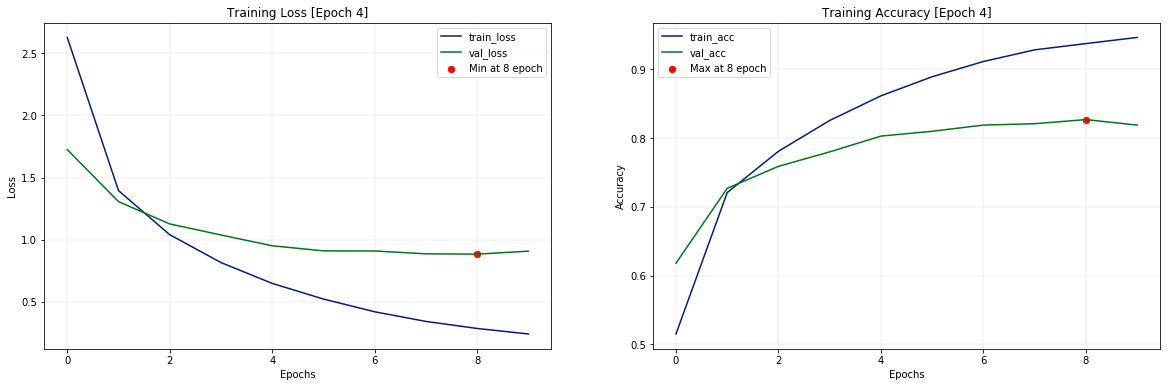

In [323]:
model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    callbacks=[plot_losses],
                    validation_data=(X_val, y_val))
pass

Retraining comes on 9 epochs

In [19]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

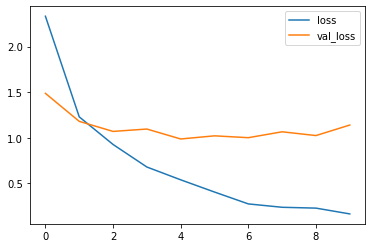

In [175]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    callbacks=[plot_losses],
                    validation_data=(X_val, y_val))

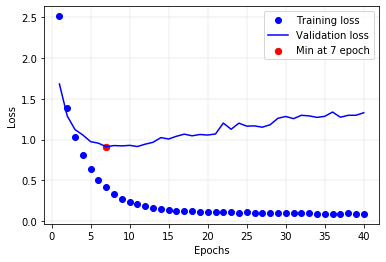

In [107]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['val_loss'])+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.scatter(np.argmin(val_loss_values)+1, min(val_loss_values), color='red', s=40, marker='o',
            label= 'Min at '+str(np.argmin(val_loss_values)+1)+' epoch')


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(linewidth=0.2)
plt.show()

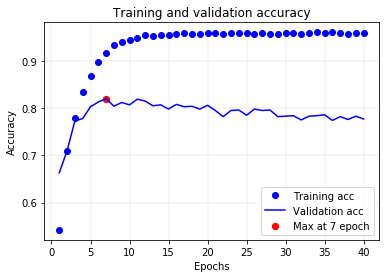

In [108]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.scatter(np.argmax(val_acc_values)+1, max(val_acc_values), color='red', s=40, marker='o', 
            label= 'Max at '+str(np.argmax(val_acc_values)+1)+' epoch')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(linewidth=0.2)
plt.show()

In [165]:
results = model.evaluate(X_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 201us/step


In [166]:
results

[1.260446555467981, 0.7742653606411398]